In [1]:
%load_ext autoreload
%autoreload 2

# Prediction based on probability - Person Income, Loan Amount, Loan Grade

In [29]:
import pandas
import numpy
import matplotlib.pyplot as plt
import itertools

In [54]:
import loan_approval_lib
from loan_approval_lib import logspace, linspace

In [4]:
data = loan_approval_lib.load_data()

In [5]:
data_train = data['train']

In [6]:
data_test = data['test']

In [7]:
len(data_test)

39098

In [8]:
data_train

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [9]:
data_test

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


# Person Income, Loan Amount by Loan Grade

In [10]:
data_train_loan_status_accept = data_train[data_train['loan_status'] == 1]
data_train_loan_status_deny = data_train[data_train['loan_status'] == 0]

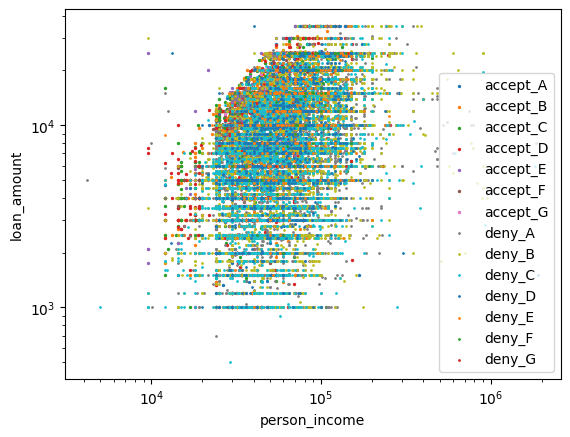

In [15]:
for loan_grade, df in data_train_loan_status_accept.groupby('loan_grade'):
    _ = plt.scatter(
        df['person_income'],
        df['loan_amnt'],
        s=2,
        label=f'accept_{loan_grade}',
    )

for loan_grade, df in data_train_loan_status_deny.groupby('loan_grade'):
    _ = plt.scatter(
        df['person_income'],
        df['loan_amnt'],
        s=1,
        label=f'deny_{loan_grade}',
    )

plt.legend()
plt.xlabel('person_income')
plt.ylabel('loan_amount')
plt.xscale('log')
plt.yscale('log')

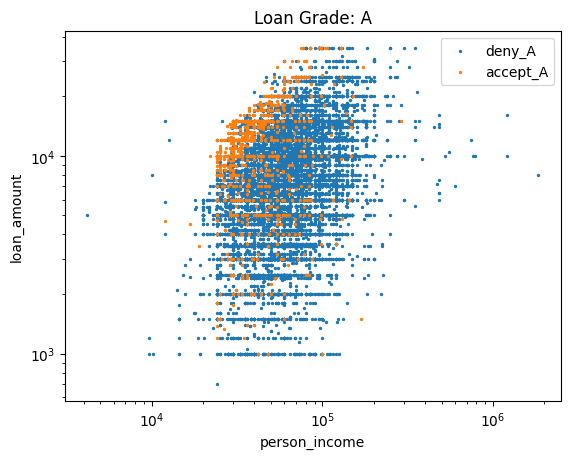

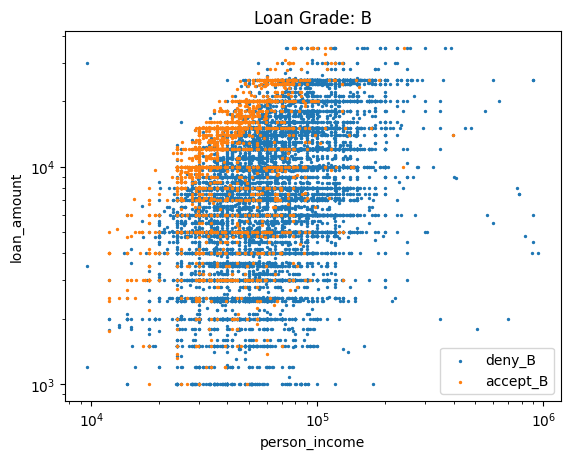

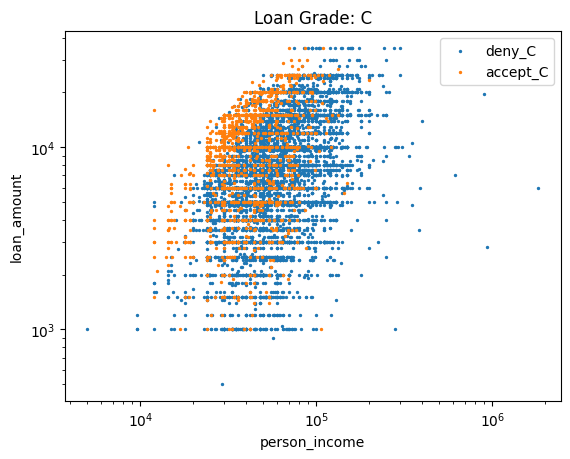

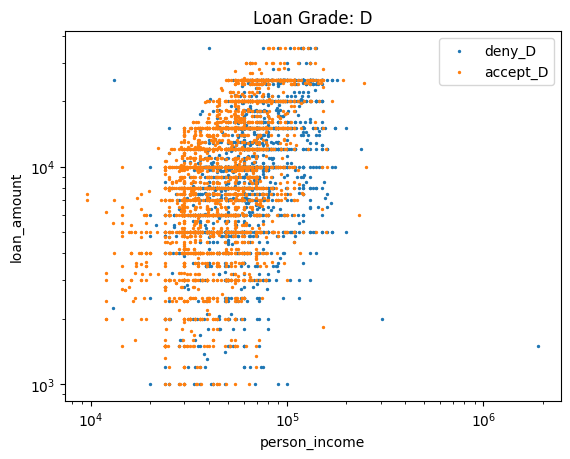

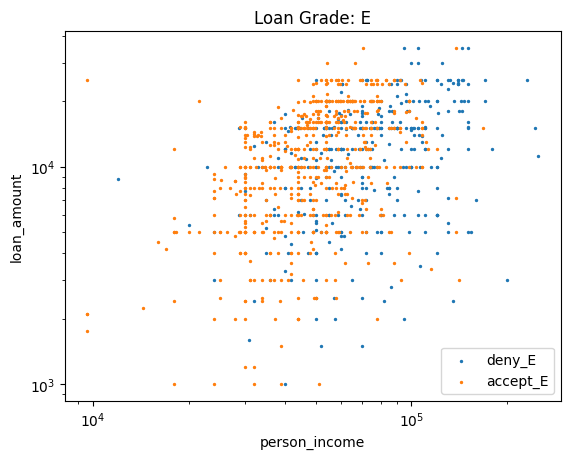

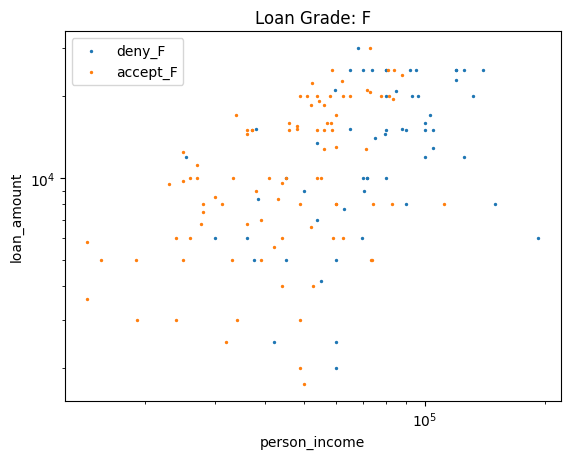

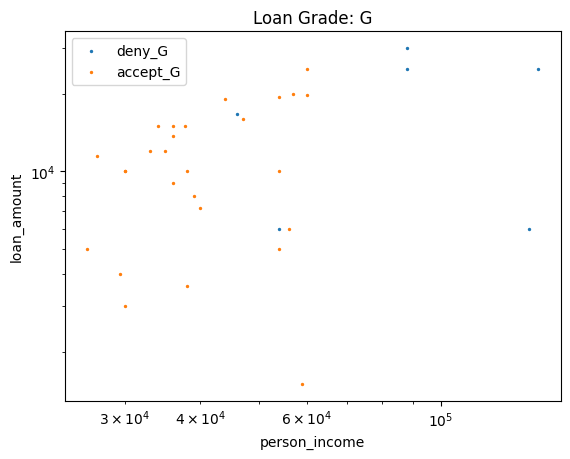

In [37]:
for i, (loan_grade, df) in enumerate(data_train.groupby('loan_grade')):
    plt.figure()
    
    for loan_status, df1 in df.groupby('loan_status'):
        
        loan_status_text = {
            0: 'deny',
            1: 'accept',
        }[loan_status]
    
        #ax = plt.subplot(3, 3, (i//2)+1)
        _ = plt.scatter(
            df1['person_income'],
            df1['loan_amnt'],
            s=2,
            label=f'{loan_status_text}_{loan_grade}',
        )
        plt.xlabel('person_income')
        plt.ylabel('loan_amount')
        plt.xscale('log')
        plt.yscale('log')
        plt.title(f'Loan Grade: {loan_grade}')
        plt.legend()
        #ax.title(f'{loan_grade}')

# for loan_grade, df in data_train_loan_status_deny.groupby('loan_grade'):
#     _ = plt.scatter(
#         df['person_income'],
#         df['loan_amnt'],
#         s=1,
#         label=f'deny_{loan_grade}',
#     )

# plt.legend()
# plt.xlabel('person_income')
# plt.ylabel('loan_amount')
# plt.xscale('log')
# plt.yscale('log')

Splitting by Loan Grade does not look like a sensible thing to do here

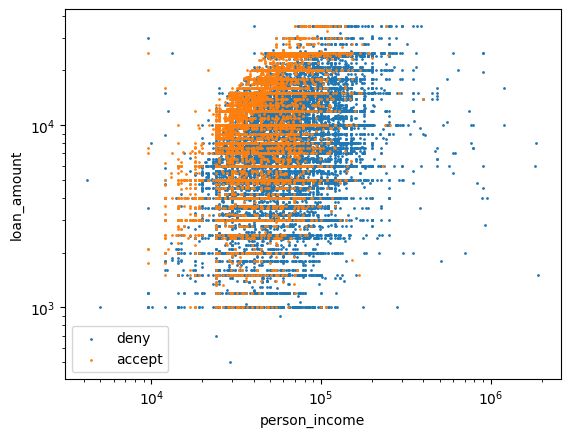

In [35]:
for loan_status, df in data_train.groupby('loan_status'):
    loan_status_text = {
        0: 'deny',
        1: 'accept',
    }[loan_status]
    
    _ = plt.scatter(
        df['person_income'],
        df['loan_amnt'],
        s=1,
        label=f'{loan_status_text}',
    )

plt.legend()
plt.xlabel('person_income')
plt.ylabel('loan_amount')
plt.xscale('log')
plt.yscale('log')

Note that the behaviour is the inverse to what would be expected. Higher earners borrowing less are more likely to be rejected. This is regardless of the loan grade.

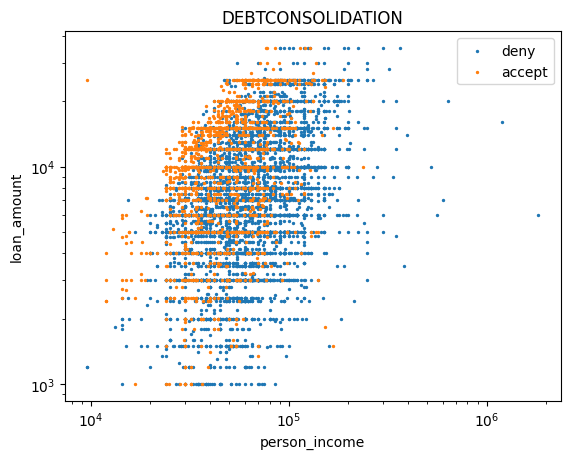

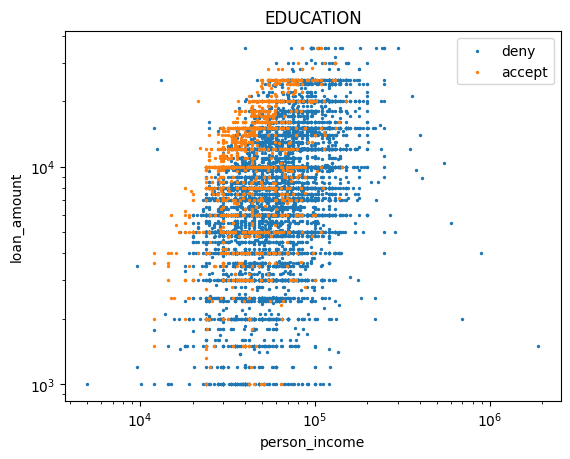

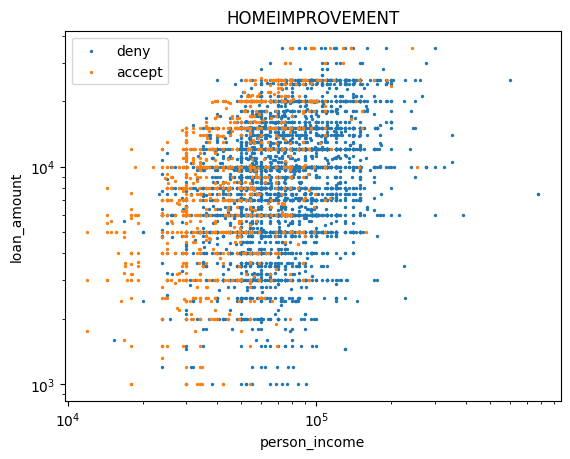

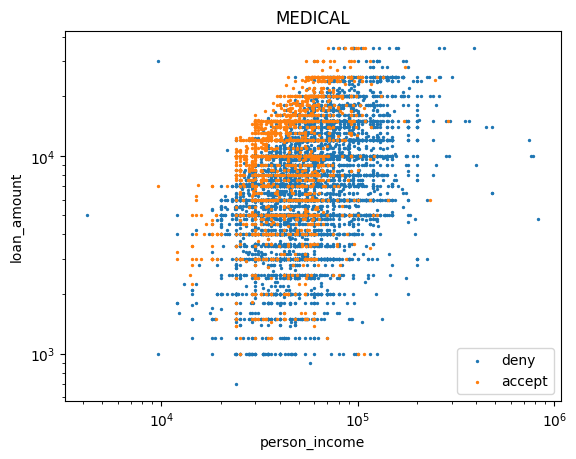

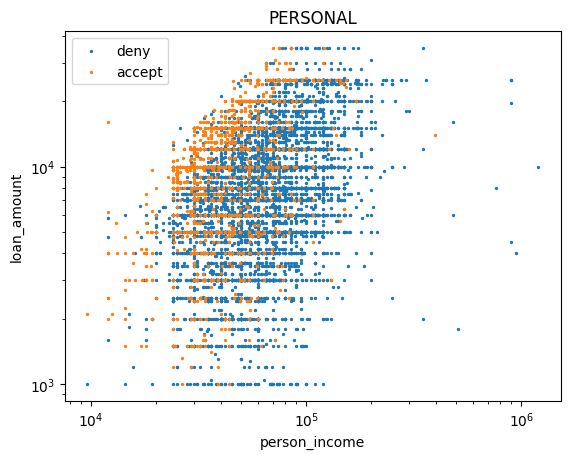

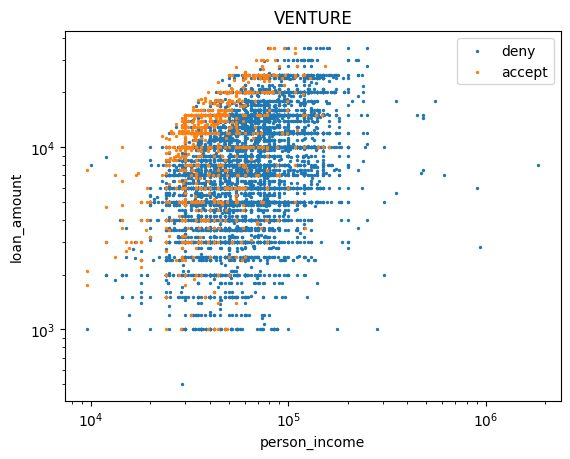

In [41]:
for i, (loan_intent, df) in enumerate(data_train.groupby('loan_intent')):
    plt.figure()
    
    for loan_status, df1 in df.groupby('loan_status'):
        
        loan_status_text = {
            0: 'deny',
            1: 'accept',
        }[loan_status]
    
        #ax = plt.subplot(3, 3, (i//2)+1)
        _ = plt.scatter(
            df1['person_income'],
            df1['loan_amnt'],
            s=2,
            label=f'{loan_status_text}',
        )
        plt.xlabel('person_income')
        plt.ylabel('loan_amount')
        plt.xscale('log')
        plt.yscale('log')
        plt.title(f'{loan_intent}')
        plt.legend()
        

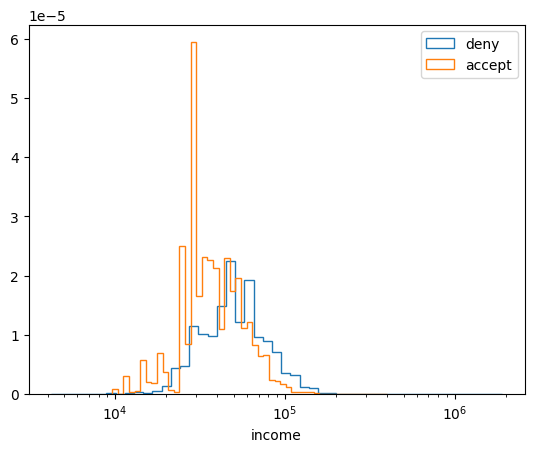

In [44]:
column = 'person_income'

_ = plt.hist(
    data_train_loan_status_deny[column],
    bins=logspace(data_train_loan_status_deny[column]),
    histtype='step',
    density=True,
    label='deny',
)
_ = plt.hist(
    data_train_loan_status_accept[column],
    bins=logspace(data_train_loan_status_accept[column]),
    histtype='step',
    density=True,
    label='accept',
)
plt.xlabel('income')
plt.xscale('log')
plt.legend()
None
#plt.yscale('log')

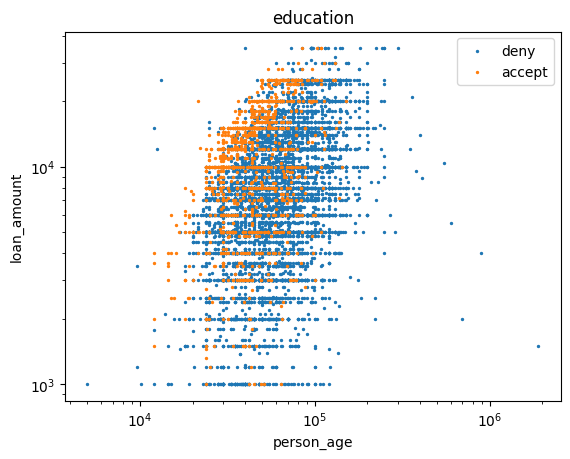

In [49]:
# does education depend strongly on age?

df_train_education = data_train[data_train['loan_intent'] == 'EDUCATION']

plt.figure()

for loan_status, df1 in df_train_education.groupby('loan_status'):
    
    loan_status_text = {
        0: 'deny',
        1: 'accept',
    }[loan_status]

    #ax = plt.subplot(3, 3, (i//2)+1)
    _ = plt.scatter(
        df1['person_income'],
        df1['loan_amnt'],
        s=2,
        label=f'{loan_status_text}',
    )
    plt.xlabel('person_age')
    plt.ylabel('loan_amount')
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'education')
    plt.legend()

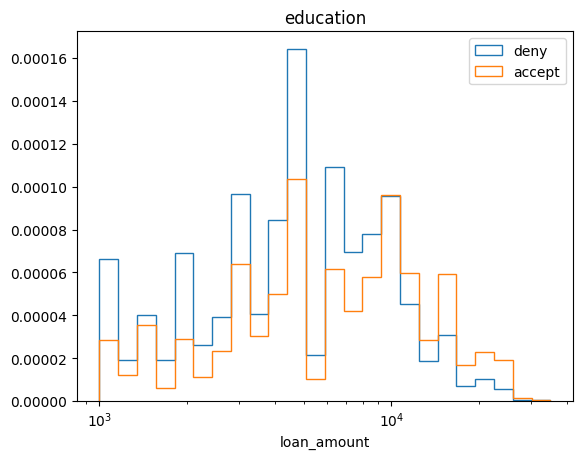

In [55]:
plt.figure()

for loan_status, df1 in df_train_education.groupby('loan_status'):
    
    loan_status_text = {
        0: 'deny',
        1: 'accept',
    }[loan_status]

    #ax = plt.subplot(3, 3, (i//2)+1)
    _ = plt.hist(
        #df1['person_income'],
        df1['loan_amnt'],
        histtype='step',
        label=f'{loan_status_text}',
        density=True,
        bins=logspace(df1['loan_amnt'], 25),
    )
    plt.xlabel('loan_amount')
    #plt.ylabel('loan_amount')
    plt.xscale('log')
    #plt.yscale('log')
    plt.title(f'education')
    plt.legend()

Text(0, 0.5, 'loan_status')

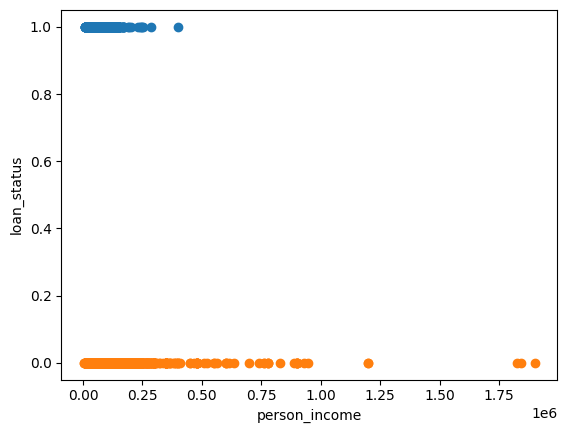

In [18]:
column = 'person_income'

_ = plt.scatter(
    data_train_loan_status_accept[column],
    data_train_loan_status_accept['loan_status'],
)
_ = plt.scatter(
    data_train_loan_status_deny[column],
    data_train_loan_status_deny['loan_status'],
)
plt.xlabel('person_income')
plt.ylabel('loan_status')
#plt.xscale('log')
#plt.yscale('log')

# Loan Amount

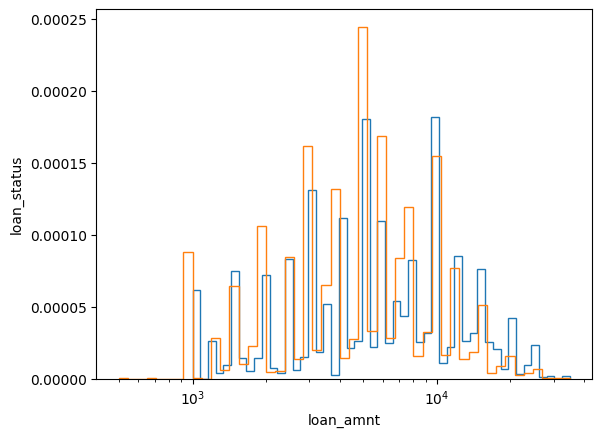

In [21]:
column = 'loan_amnt'

_ = plt.hist(
    data_train_loan_status_accept[column],
    bins=logspace(data_train_loan_status_accept[column]),
    histtype='step',
    density=True,
)
_ = plt.hist(
    data_train_loan_status_deny[column],
    bins=logspace(data_train_loan_status_deny[column]),
    histtype='step',
    density=True,
)
plt.xlabel(column)
plt.ylabel('loan_status')
plt.xscale('log')
#plt.yscale('log')

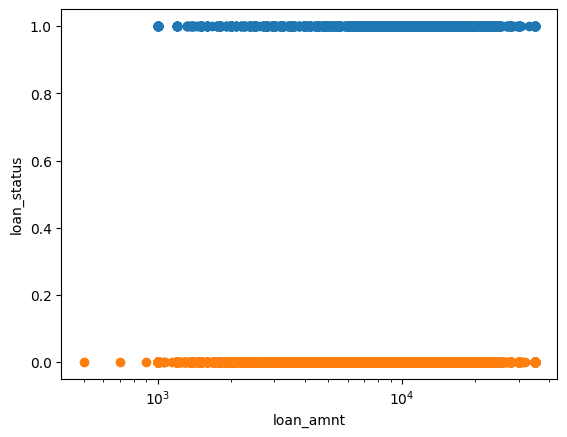

In [31]:
column = 'loan_amnt'

_ = plt.scatter(
    data_train_loan_status_accept[column],
    data_train_loan_status_accept['loan_status'],
)
_ = plt.scatter(
    data_train_loan_status_deny[column],
    data_train_loan_status_deny['loan_status'],
)
plt.xlabel(column)
plt.ylabel('loan_status')
None
plt.xscale('log')
#plt.yscale('log')

# Generate new feature

In [54]:
data_train['loan_amount_to_income_ratio'] = data_train['loan_amnt'] / data_train['person_income']
data_test['loan_amount_to_income_ratio'] = data_test['loan_amnt'] / data_test['person_income']

data_train_loan_status_accept = data_train[data_train['loan_status'] == 1]
data_train_loan_status_deny = data_train[data_train['loan_status'] == 0]

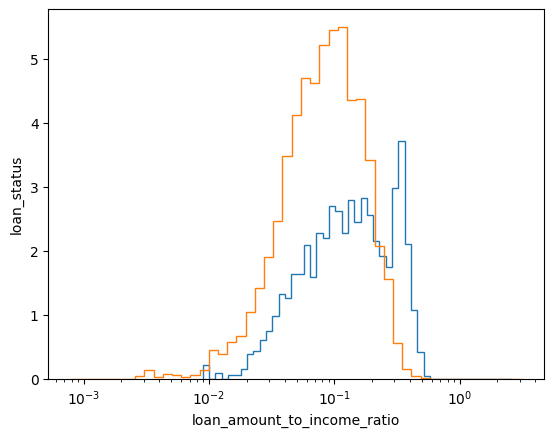

In [29]:
column = 'loan_amount_to_income_ratio'

_ = plt.hist(
    data_train_loan_status_accept[column],
    bins=logspace(data_train_loan_status_accept[column]),
    histtype='step',
    density=True,
)
_ = plt.hist(
    data_train_loan_status_deny[column],
    bins=logspace(data_train_loan_status_deny[column]),
    histtype='step',
    density=True,
)
plt.xlabel(column)
plt.ylabel('loan_status')
plt.xscale('log')
#plt.yscale('log')

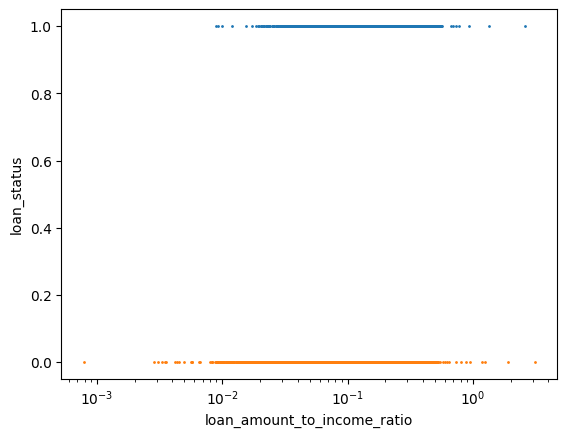

In [52]:
column = 'loan_amount_to_income_ratio'

_ = plt.scatter(
    data_train_loan_status_accept[column],
    data_train_loan_status_accept['loan_status'],
    s=1,
)
_ = plt.scatter(
    data_train_loan_status_deny[column],
    data_train_loan_status_deny['loan_status'],
    s=1,
)
plt.xlabel(column)
plt.ylabel('loan_status')
None
plt.xscale('log')
#plt.yscale('log')

In [ ]:
x = data_train['loan_amount_to_income_ratio'].to_numpy()
x = x.reshape(-1, 1)
x

In [47]:
y = data_train['loan_status'].to_numpy()
#y

In [48]:
import sklearn

model = sklearn.linear_model.LogisticRegression(penalty=None)

clf = model.fit(x, y)

clf

LogisticRegression(penalty=None)

In [49]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': None,
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [51]:
clf.score(x, y)

0.8743285872623412

### Generate Training Output

In [56]:
x1 = data_test['loan_amount_to_income_ratio'].to_numpy()
x1 = x1.reshape(-1, 1)

y1 = clf.predict(x1)

In [57]:
clf.score(x1, y1)

1.0

### Generate Output

In [61]:
data_test_submission = pandas.DataFrame(
    {
        'id': data_test['id'],
        'loan_status': y1,
    }
)
data_test_submission

,id,loan_status
0,58645,1
1,58646,0
2,58647,0
3,58648,0
4,58649,0
...,...,...
39093,97738,0
39094,97739,0
39095,97740,0
39096,97741,1


In [62]:
data_test_submission.to_csv('data_test_submission_6.csv', index=False)